## MI 5

## 1. Cross-validation




In [3]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_train = np.array(pd.read_csv('TrainingRidge.csv'))
data_valid = np.array(pd.read_csv('ValidationRidge.csv'))



ImportError: cannot import name 'issparse' from 'scipy.sparse' (unknown location)

### Preprocessing

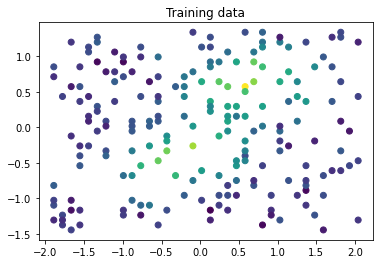

In [59]:

def covariance  (x1,x2):
    return 1/len(x1)/np.dot(np.array([x1,x2]),np.array([x1,x2]).T)

def preprocessing (x,x_v):
    
    x1 = x[0] - np.mean(x[0])
    x2 = x[1] - np.mean(x[1])
    x1_v = x_v[0] - np.mean(x[0])
    x2_v = x_v[1] - np.mean(x[1])

    C = np.cov(x1,x2)
    #C = covariance(x1,x2)

    E_values,E_vectors = LA.eig(C)
    x_sphering = np.dot(np.power(E_values, -1/2), E_vectors.T) 
    
    x1_s = np.dot(x_sphering[0], x1)
    x2_s = np.dot(x_sphering[1],x2)
    x1_s_v = np.dot(x_sphering[0], x1_v)
    x2_s_v = np.dot(x_sphering[1],x2_v)
    
    return [x1_s, x2_s],[x1_s_v,x2_s_v]




x = [data_train[:,0],data_train[:,1]]
y_T = data_train[:,2]
x_v = [data_valid[:,0],data_valid[:,1]]
y_T_v = data_valid[:,2]

x_s,x_s_v = preprocessing(x,x_v)


plt.scatter(x_s[0], x_s[1],c=y_T)
plt.title('Training data')
plt.show()

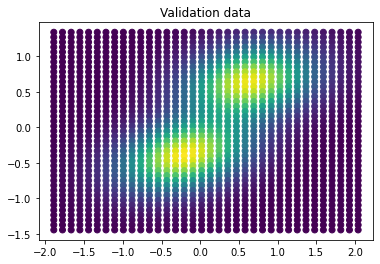

In [52]:
plt.scatter(x_s_v[0],x_s_v[1], c = y_T_v)
plt.title('Validation data')
plt.show()

### Feature expansion

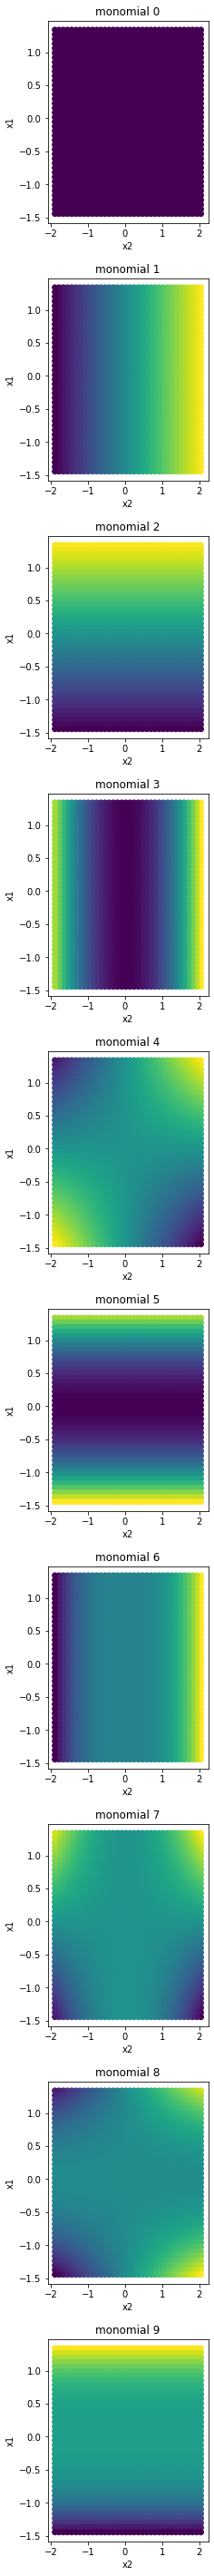

In [48]:
def monomials(x1,x2,degree):
    phi = []
    for k in range(degree):
        for i in range (k+1) :
            phi.append((np.power(x1,k-i)*np.power(x2,i)))
    return np.array(phi)

def plotting(x,phi):
    fig,ax = plt.subplots(nrows = 10, figsize=(4,40))
    fig.tight_layout(pad =4)
    #fig.suptitle('The first 10 monomials as a function of x1,x2')
    
    for i in range (10):
        ax[i].scatter(x[0], x[1], c = phi[i])
        ax[i].set_title('monomial '+str(i))
        ax[i].set_xlabel('x2')
        ax[i].set_ylabel('x1')
    
    plt.show()
    return 
    
phi = monomials(x_s[0],x_s[1],10)
phi_v  = monomials(x_s_v[0],x_s_v[1],10)
    
plotting(x_s_v, phi_v)

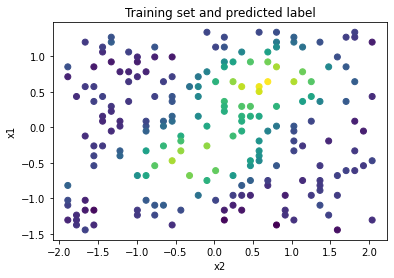

In [72]:
w_star = np.dot(LA.inv(np.dot(phi,phi.T)),np.dot(phi,y_T.T))

prediction_function = lambda w,phi : np.dot(w.T,phi)

y = prediction_function(w_star,phi)
plt.scatter(x_s[0],x_s[1],c=y)
plt.title('Training set and predicted label')
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()



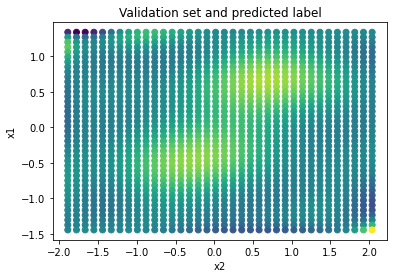

In [73]:

y_v = prediction_function(w_star,phi_v)

plt.scatter(x_s_v[0],x_s_v[1],c=y_v)
plt.title('Validation set and predicted label')
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()


### Regularization using a weight decay term


In [4]:
MSE_calc = lambda y,y_hat : 1/len(y)*np.sum(np.power(y-y_hat,2))


def cross_valid (phi,y):
    MSE = []
    I = np.identity(len(phi))
    for lama  in np.power(10,np.arange(-4,4,0.1)):
        train,test = train_test_split(phi.append(y), train_size=0.8)
        print(train.shape())
        #weight_star = np.dot(LA.inv(np.dot(x_train,x_train.T)+ lama*I),np.dot(x_train,y.T))
        #y_hat = prediction_function(w_star,x_valid)
        #MSE.append(MSE_calc(y,y_hat))
        
    #return MSE,weight_star

In [5]:
MSE,weight_star =cross_valid(phi,y_T)

NameError: name 'phi' is not defined

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipy.sparse (from versions: none)
ERROR: No matching distribution found for scipy.sparse
